In this assignment, you will continue to study the data of the US Education System

### Does the performance in the exams vary according to gender, origin and education level of parents?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isnull().sum()*100/df.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100

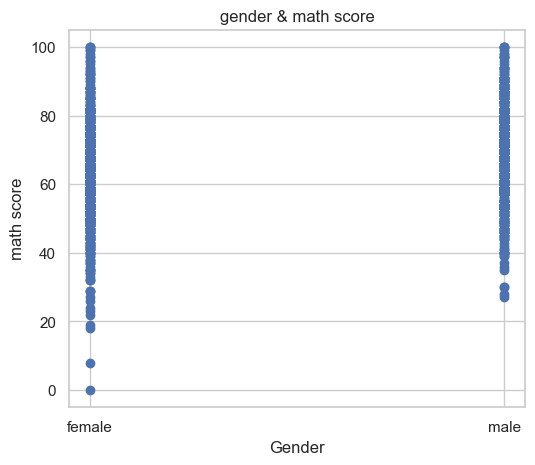

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(df["gender"], df["math score"])
plt.title("gender & math score")
plt.xlabel('Gender')
plt.ylabel('math score')
plt.show()

Regarding math scroe we don't have much difference between two genders. But lowers grades are belongs to 'female' group. We can cosider such scores also as outliers.

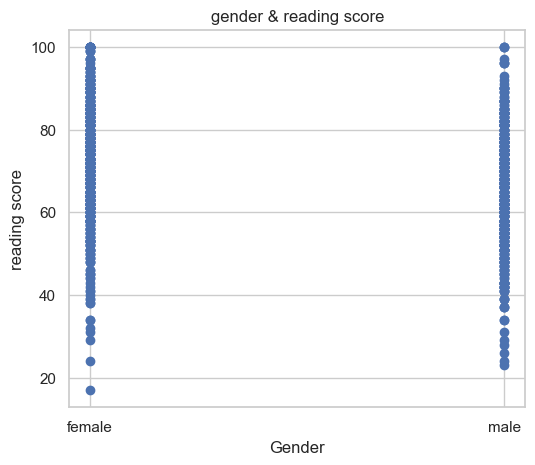

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(df["gender"], df["reading score"])
plt.title("gender & reading score")
plt.xlabel('Gender')
plt.ylabel('reading score')
plt.show()

No difference in reading results

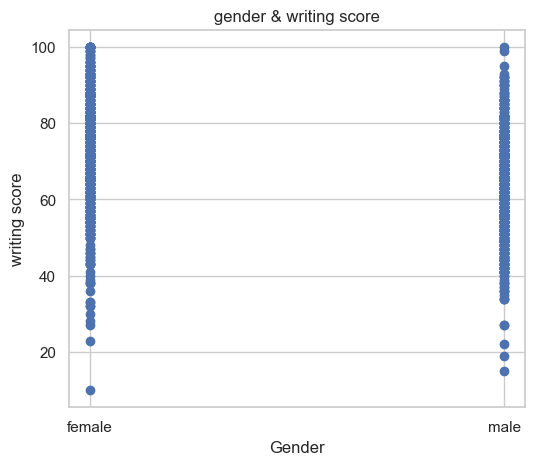

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(df["gender"], df["writing score"])
plt.title("gender & writing score")
plt.xlabel('Gender')
plt.ylabel('writing score')
plt.show()

It seems that a'female' group perfomed in writing a bit better than 'male'

In [31]:
df.groupby("gender")['math score'].mean().T  #Male group had higher scores 

gender
female   63.63
male     68.73
Name: math score, dtype: float64

In [32]:
df.groupby("gender")['reading score'].mean().T #Female group had higher scores

gender
female   72.61
male     65.47
Name: reading score, dtype: float64

In [33]:
df.groupby("gender")['writing score'].mean().T #Female group had higher scores

gender
female   72.47
male     63.31
Name: writing score, dtype: float64

In [36]:
df.groupby("race/ethnicity")['math score'].mean().T #There is an increasing from A to E

race/ethnicity
group A   61.63
group B   63.45
group C   64.46
group D   67.36
group E   73.82
Name: math score, dtype: float64

In [37]:
df.groupby("race/ethnicity")['reading score'].mean().T

race/ethnicity
group A   64.67
group B   67.35
group C   69.10
group D   70.03
group E   73.03
Name: reading score, dtype: float64

In [38]:
df.groupby("race/ethnicity")['writing score'].mean().T

race/ethnicity
group A   62.67
group B   65.60
group C   67.83
group D   70.15
group E   71.41
Name: writing score, dtype: float64

In [45]:
df.groupby("parental level of education")['math score'].mean().T   #No big difference. The results are almost the same

parental level of education
associate's degree   67.88
bachelor's degree    69.39
high school          62.14
master's degree      69.75
some college         67.13
some high school     63.50
Name: math score, dtype: float64

In [42]:
df.groupby("parental level of education")['reading score'].mean().T   #Bachalor's degree and Master's degree groups have higher scores

parental level of education
associate's degree   70.93
bachelor's degree    73.00
high school          64.70
master's degree      75.37
some college         69.46
some high school     66.94
Name: reading score, dtype: float64

In [44]:
df.groupby("parental level of education")['writing score'].mean().T  #Bachalor's degree and Master's degree groups have higher scores

parental level of education
associate's degree   69.90
bachelor's degree    73.38
high school          62.45
master's degree      75.68
some college         68.84
some high school     64.89
Name: writing score, dtype: float64

### Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [46]:
df.groupby("lunch")['math score'].mean().T

lunch
free/reduced   58.92
standard       70.03
Name: math score, dtype: float64

In [49]:
df.groupby("lunch")['writing score'].mean().T

lunch
free/reduced   63.02
standard       70.82
Name: writing score, dtype: float64

In [50]:
df.groupby("lunch")['reading score'].mean().T

lunch
free/reduced   64.65
standard       71.65
Name: reading score, dtype: float64

In [51]:
df.groupby("lunch")['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.00,58.92,15.16,0.00,49.00,60.00,69.00,100.00
standard,645.00,70.03,13.65,19.00,61.00,69.00,80.00,100.00


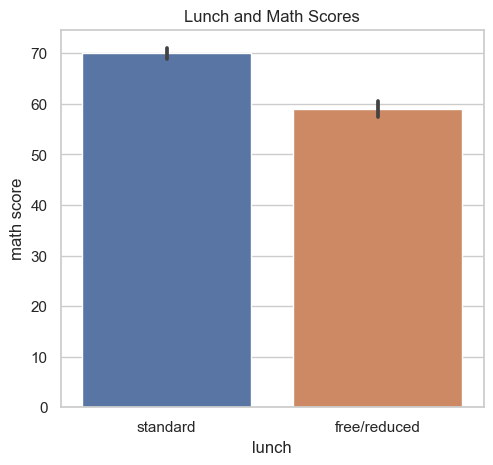

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(df["lunch"], df["math score"])
plt.title("Lunch and Math Scores")
plt.show()

Students who had standart lunch had better results

### Does the preparation courses have an impact on exam performance?

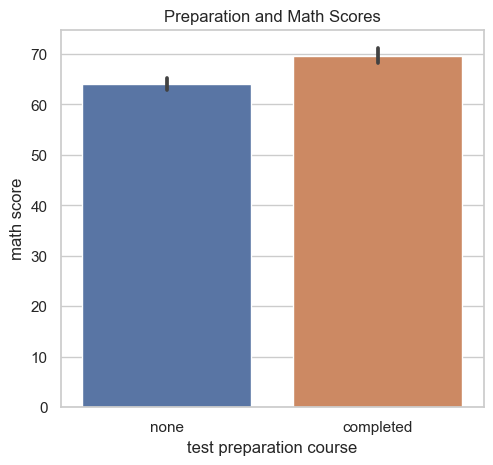

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(df["test preparation course"], df["math score"])
plt.title("Preparation and Math Scores")
plt.show()

Students who completed test preparation course, had higher results

### Which lessons are most correlated with each other?

In [54]:
df.corr()

,math score,reading score,writing score
math score,1.00,0.82,0.80
reading score,0.82,1.00,0.95
writing score,0.80,0.95,1.00


Reading and writing lessons are most correlated with each other